In [75]:
import pandas as pd
import seaborn as sns
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from keras.models import Sequential
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
import re
from sklearn.feature_extraction.text import CountVectorizer
from keras.datasets import imdb
import pandas as pd
import numpy as np
from keras.layers import LSTM, Activation, Dropout, Dense, Input, Reshape
from keras.layers.embeddings import Embedding
from keras.models import Model
import string
import re
from keras.preprocessing.text import Tokenizer
from sklearn.preprocessing import LabelBinarizer
from keras.preprocessing.sequence import pad_sequences
import keras
from sklearn.model_selection import train_test_split
import tensorflow as tf
from numpy import asarray
from numpy import zeros
from sklearn.model_selection import cross_val_score
from tensorflow.keras import layers
from tensorflow.keras import activations
!pip install imblearn
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTETomek
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from collections import Counter
from sklearn.manifold import TSNE 
from matplotlib import pyplot as plt
import sklearn.preprocessing

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [2]:
tweet_data = pd.read_csv(r"/content/drive/MyDrive/TWEET ABUSE DATA/Train_Data.csv")

In [3]:
tweet_data.head(15)

,tweet,label
0,start your day w your daily here,3
1,even a perfect life doesn’t feel perfect in so...,3
2,great ready for next week s q amp a with white...,3
3,5 ways to protect your mental health during th...,3
4,i m officially an occupational therapist passe...,3
5,not good enough this is all,3
6,so the new season of dropped today and despite...,3
7,today is a good day to spread some love and se...,3
8,have seen quite a few tweets recently with peo...,3
9,i’m running 144 4 miles over 20 days for to ra...,2


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


3    2165
2     124
1      61
Name: label, dtype: int64

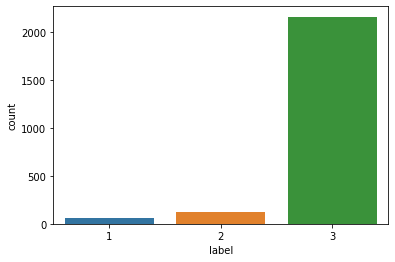

In [4]:
sns.countplot(tweet_data.label)
tweet_data.label.value_counts()

In [5]:
tweet_data.groupby('label').size() 


label
1      61
2     124
3    2165
dtype: int64

In [6]:
lm = WordNetLemmatizer()

In [7]:
def text_transformation(df_col):
    corpus = []
    for item in df_col:
        new_item = re.sub('[^a-zA-Z]',' ',str(item))
        new_item = new_item.lower()
        new_item = new_item.split()
        new_item = [lm.lemmatize(word) for word in new_item if word not in set(stopwords.words('english'))]
        corpus.append(' '.join(str(x) for x in new_item))
    return corpus

In [8]:
corpus = text_transformation(tweet_data['tweet'])

In [9]:
corpus

['start day w daily',
 'even perfect life feel perfect much pain right med hope get better soon worst headache wait go bed u know hurt',
 'great ready next week q amp whitey talk panel expert broker around country register',
 'way protect mental health time link bio atlanta georgia',
 'officially occupational therapist passed degree got offered first occupational therapy job week ago acute specialist mental health unit',
 'good enough',
 'new season dropped today despite hard watch stop even though fictional perceived reality teen deal today impactful incredible actor',
 'today good day spread love sending love great mental health',
 'seen quite tweet recently people saying feel low struggling emotionally think going completely unusual time right help reaching offer support',
 'running mile day raise money living hiv need mental health support run early today mile done go full story amp sponsor',
 'peer individual family looking way help people better understand many layer life',
 'app

In [10]:
processed_tweets = pd.DataFrame (corpus, columns = ['processed_tweets'])
processed_tweets.head(15)

,processed_tweets
0,start day w daily
1,even perfect life feel perfect much pain right...
2,great ready next week q amp whitey talk panel ...
3,way protect mental health time link bio atlant...
4,officially occupational therapist passed degre...
5,good enough
6,new season dropped today despite hard watch st...
7,today good day spread love sending love great ...
8,seen quite tweet recently people saying feel l...
9,running mile day raise money living hiv need m...


In [ ]:
vectorizer = CountVectorizer(ngram_range=(1,2),min_df=1)
traindata = vectorizer.fit_transform(corpus).toarray()
X = traindata
y = tweet_data.label
print("Vocabulary: ", vectorizer.vocabulary_)

Vocabulary:  {'start': 22014, 'day': 5447, 'daily': 5329, 'start day': 22022, 'day daily': 5464, 'even': 7404, 'perfect': 17317, 'life': 13186, 'feel': 8151, 'much': 15263, 'pain': 16801, 'right': 19951, 'med': 14524, 'hope': 10917, 'get': 9149, 'better': 2502, 'soon': 21698, 'worst': 26678, 'headache': 10194, 'wait': 25610, 'go': 9375, 'bed': 2339, 'know': 12589, 'hurt': 11158, 'even perfect': 7421, 'perfect life': 17319, 'life feel': 13213, 'feel perfect': 8190, 'perfect much': 17321, 'much pain': 15298, 'pain right': 16807, 'right med': 19971, 'med hope': 14528, 'hope get': 10930, 'get better': 9161, 'better soon': 2529, 'soon worst': 21704, 'worst headache': 26682, 'headache wait': 10196, 'wait go': 25613, 'go bed': 9382, 'bed know': 2341, 'know hurt': 12624, 'great': 9685, 'ready': 19100, 'next': 15907, 'week': 25971, 'amp': 992, 'whitey': 26193, 'talk': 23201, 'panel': 16863, 'expert': 7778, 'broker': 3035, 'around': 1660, 'country': 4945, 'register': 19413, 'great ready': 9724, 

In [11]:
stopwords = [ "a", "about", "above", "after", "again", "against", "all", "am", "an", "and", "any", "are", "as", "at", "be", "because", 
             "been", "before", "being", "below", "between", "both", "but", "by", "could", "did", "do", "does", "doing", "down", "during",
             "each", "few", "for", "from", "further", "had", "has", "have", "having", "he", "he'd", "he'll", "he's", "her", "here", 
             "here's", "hers", "herself", "him", "himself", "his", "how", "how's", "i", "i'd", "i'll", "i'm", "i've", "if", "in", "into",
             "is", "it", "it's", "its", "itself", "let's", "me", "more", "most", "my", "myself", "nor", "of", "on", "once", "only", "or",
             "other", "ought", "our", "ours", "ourselves", "out", "over", "own", "same", "she", "she'd", "she'll", "she's", "should", 
             "so", "some", "such", "than", "that", "that's", "the", "their", "theirs", "them", "themselves", "then", "there", "there's",
             "these", "they", "they'd", "they'll", "they're", "they've", "this", "those", "through", "to", "too", "under", "until", "up",
             "very", "was", "we", "we'd", "we'll", "we're", "we've", "were", "what", "what's", "when", "when's", "where", "where's",
             "which", "while", "who", "who's", "whom", "why", "why's", "with", "would", "you", "you'd", "you'll", "you're", "you've",
             "your", "yours","u","yourself", "yourselves" ]
             
             


In [ ]:
def remove_stopwords(data):
  data['review without stopwords'] = tweet_data['tweet'].apply(lambda x : ' '.join([word for word in x.split() if word not in (stopwords)]))
  return data

def remove_tags(string):
    result = re.sub('<.*?>','',string)
    return result
    
data_without_stopwords = remove_stopwords(data)
data_without_stopwords['clean_review']= data_without_stopwords['review without stopwords'].apply(lambda cw : remove_tags(cw))
data_without_stopwords['clean_review'] = data_without_stopwords['clean_review'].str.replace('[{}]'.format(string.punctuation), ' ')



NameError: ignored

In [12]:
vocabulary_size = 200000
t=tf.keras.preprocessing.text.Tokenizer(num_words=vocabulary_size,filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n',lower=True)

In [13]:
t.fit_on_texts(corpus)
vocab_size = len(t.word_index) + 1
encoded_docs = t.texts_to_sequences(corpus)
print(encoded_docs)    

[[106, 12, 123, 370], [124, 453, 17, 26, 453, 40, 454, 60, 504, 130, 13, 56, 371, 629, 1862, 505, 57, 630, 5, 18, 396], [28, 397, 107, 30, 825, 1, 2727, 35, 1158, 631, 2728, 111, 191, 277], [22, 214, 2, 3, 8, 159, 506, 2729, 1863], [1864, 979, 215, 2730, 1159, 192, 1865, 160, 979, 125, 228, 30, 455, 1426, 1160, 2, 3, 980], [24, 398], [25, 1427, 2731, 16, 1161, 193, 146, 101, 124, 632, 2732, 2733, 456, 716, 288, 16, 2734, 1162, 1866], [16, 24, 12, 981, 44, 1428, 44, 28, 2, 3], [564, 717, 457, 633, 7, 982, 26, 458, 161, 565, 67, 48, 1163, 1867, 8, 60, 4, 2735, 372, 9], [634, 399, 12, 289, 422, 216, 2736, 6, 2, 3, 9, 423, 459, 16, 399, 171, 57, 172, 126, 1, 1164], [566, 400, 61, 137, 22, 4, 7, 56, 131, 23, 1868, 17], [373, 93, 2, 3, 566, 1160, 304, 1429, 983, 202, 983, 507, 62, 121, 373, 162], [80, 718, 2737, 86, 826, 827, 1430, 2738, 2739, 984, 132, 80], [567, 140, 338, 6, 4, 508, 828, 228, 229, 829, 259, 113, 509, 510, 215, 260, 6, 40, 9], [1165, 1869, 339, 17, 29, 45, 11, 261], [16, 14

In [14]:
print("The word index",t.word_index)

The word index {'amp': 1, 'mental': 2, 'health': 3, 'help': 4, 'u': 5, 'need': 6, 'people': 7, 'time': 8, 'support': 9, 'take': 10, 'one': 11, 'day': 12, 'get': 13, 'care': 14, 'please': 15, 'today': 16, 'life': 17, 'know': 18, 'like': 19, 'important': 20, 'make': 21, 'way': 22, 'many': 23, 'good': 24, 'new': 25, 'feel': 26, 'anxiety': 27, 'great': 28, 'want': 29, 'week': 30, 'child': 31, 'work': 32, 'woman': 33, 'join': 34, 'talk': 35, 'issue': 36, 'free': 37, 'via': 38, 'see': 39, 'much': 40, 'well': 41, 'thing': 42, 'check': 43, 'love': 44, 'live': 45, 'find': 46, 'call': 47, 'going': 48, 'service': 49, 'year': 50, 'community': 51, 'self': 52, 'thought': 53, 'others': 54, 'read': 55, 'better': 56, 'go': 57, 'let': 58, 'learn': 59, 'right': 60, 'family': 61, 'june': 62, 'black': 63, 'pandemic': 64, 'someone': 65, 'look': 66, 'think': 67, 'really': 68, 'impact': 69, 'mind': 70, 'feeling': 71, 'may': 72, 'thank': 73, 'stress': 74, 'would': 75, 'book': 76, 'social': 77, 'keep': 78, 'cov

In [15]:
embeddings_index = dict()
path = "/content/drive/MyDrive/ABR/glove.6B.200d.txt"
f = open(path)
for line in f:
	values = line.split()
	word = values[0]
	coefs = asarray(values[1:], dtype='float32')
	embeddings_index[word] = coefs
f.close()
print('Loaded %s word vectors.' % len(embeddings_index))

Loaded 400000 word vectors.


In [78]:
n_values = 200 # number of music values
reshaper = Reshape((4263, n_values))
x = X_oversampled[:,25,:]
#print(x.shape)
#x = reshaper(x)
print(x.shape)

(4263, 200)


In [17]:
print(vocab_size)

5708


In [18]:
embedding_matrix = zeros((vocab_size, 200))
for word, i in t.word_index.items():
	embedding_vector = embeddings_index.get(word)
	if embedding_vector is not None:
		embedding_matrix[i] = embedding_vector

In [19]:
print(embedding_matrix[5])

[-0.10108     0.019587   -0.088978    0.13970999 -0.019511   -0.54253
 -0.36000001  0.51885003 -1.04110003 -0.081929    0.053379   -0.18276
  0.14217     0.17732     0.47361001 -0.45344999 -0.057644    0.065933
  0.15486    -0.22645999  0.35657999  1.4677      0.20055    -0.23645
  0.51590002  0.053886    0.29497001  0.25733     0.0079551   0.75046998
  0.096173   -0.53249002 -0.33864999 -0.47152001  0.65715998 -0.24879999
 -0.17362    -0.0026744  -0.13348     0.40610999 -0.69581997  0.88094997
  0.25459     0.69474    -0.70415998  0.13082001 -0.13495    -0.26925999
 -0.20697001 -0.57170999  0.58989    -0.2423      0.048737    0.10767
  0.51512003 -0.11251    -0.55144     0.12315     0.42728999  0.64232999
  0.50721002 -0.28481001  0.17290001  0.44152001 -0.49498001 -0.76837999
 -0.22028001 -0.12051     1.07159996  0.066308    0.86620998  0.0483
  0.24860001 -1.13310003  0.18298     0.023311    0.21239001 -0.18422
 -0.66351998  0.30168     0.23108    -0.29745999 -0.16122     0.77209002

In [20]:
model = Sequential()

In [23]:
max_length = 34
#The embedding layer maps the words to their embedding vectors from the embedding matrix.
# We can keep this layer as trainable, which will learn the word embedding itself but as we are using GloVe Embeddings, we won’t keep the layer as trainable.
loss_fn = tf.keras.losses.MeanSquaredError()
embedding_model = Sequential()
embedding_layer = Embedding(input_dim=vocab_size, output_dim=200, input_length=max_length, weights = [embedding_matrix], trainable=False)
embedding_model.add(embedding_layer)
embedding_model.compile(optimizer='adam', loss='loss_fn', metrics=['mse'])
 #In Keras, the LSTM units attribute specifies the dimensionality of the layer OUTPUT
embedding_encoded_tweets_2350_34_200 = embedding_model.predict(training_paded_data)
print(embedding_encoded_tweets_2350_34_200)

[[[-0.32248    0.30604   -0.52439   ...  0.015281  -0.042533  -0.043012 ]
  [ 0.1952     0.72545   -0.10055   ... -0.13125   -0.097244  -0.11551  ]
  [-0.20966    0.56893   -0.30036   ...  0.80869    0.34116    0.37644  ]
  ...
  [ 0.         0.         0.        ...  0.         0.         0.       ]
  [ 0.         0.         0.        ...  0.         0.         0.       ]
  [ 0.         0.         0.        ...  0.         0.         0.       ]]

 [[ 0.44802    0.16025   -0.23372   ...  0.15736   -0.13639   -0.030586 ]
  [ 0.63119    0.11457   -0.24715   ...  0.40066   -0.4079     0.066267 ]
  [ 0.34098    0.41888   -0.31878   ...  0.72919    0.38914    0.37687  ]
  ...
  [ 0.         0.         0.        ...  0.         0.         0.       ]
  [ 0.         0.         0.        ...  0.         0.         0.       ]
  [ 0.         0.         0.        ...  0.         0.         0.       ]]

 [[ 0.52559    0.13313   -0.25822   ...  0.41602    0.18878    0.25919  ]
  [ 0.54919    0.51032

In [24]:
def longest(lst):
   longestList = []
   maxLength = max(len(x) for x in listA)
   for i in listA:
      if len(i) == maxLength :
         longestList = i
   return longestList, maxLength
# Driver Code
listA = encoded_docs
print("Longest List and its length:\n",longest(listA))

Longest List and its length:
 ([3774, 3775, 1, 1084, 305, 1632, 326, 123, 2354, 181, 1383, 106, 894, 204, 1, 3776, 3777, 1136, 1688, 274, 665, 11, 123, 1731, 3778, 633, 3779, 123, 3780, 623, 3781, 1, 3782, 2288], 34)


In [22]:
max_length = 34
training_paded_data= pad_sequences(encoded_docs, maxlen=max_length, padding='post')
print(training_paded_data)  # Returns :- Numpy array with shape (len(sequences), maxlen)

[[ 106   12  123 ...    0    0    0]
 [ 124  453   17 ...    0    0    0]
 [  28  397  107 ...    0    0    0]
 ...
 [ 984  483   34 ...    0    0    0]
 [1159   71   71 ...    0    0    0]
 [1416  217    1 ...    0    0    0]]


In [25]:
print(training_paded_data.shape)  

(2350, 34)


In [33]:
#def baseline_model():
lstm_model = Sequential()
lstm_model.add(LSTM(units =128, return_sequences = True, input_shape = (34,200)))
lstm_model.add(Dropout(0.2))
lstm_model.add(LSTM(units = 128, return_sequences = True))
lstm_model.add(Dropout(0.2))
lstm_model.add(LSTM(units = 64, return_sequences = True))
lstm_model.add(Dropout(0.2))
lstm_model.add(LSTM(units = 64))
lstm_model.add(Dropout(0.2))
lstm_model.add(Dense(units = 3,activation='softmax'))
adam = tf.keras.optimizers.Adam(learning_rate = 0.0001)
lstm_model.compile(optimizer=adam, loss='categorical_crossentropy', metrics=['accuracy'])
#return lstm_model

In [40]:
Inputs = Input(shape=(34,200),dtype='float32')
X = LSTM(units=128,return_sequences = True)(Inputs)
    # Add dropout with a probability of 0.5
X = Dropout(0.5)(X)
    # Propagate X trough another LSTM layer with 128-dimensional hidden state
    # The returned output should be a single hidden state, not a batch of sequences.
X = LSTM(units=128,return_sequences = False)(X)
    # Add dropout with a probability of 0.5
X = Dropout(0.5)(X)
    # Propagate X through a Dense layer with 5 units
X = Dense(3)(X)
    # Add a softmax activation
X = Activation('softmax')(X)
    
    # Create Model instance which converts sentence_indices into X.
model = Model(inputs = Inputs,outputs=X)

In [51]:
#lstm_model = baseline_model
model.summary()
adam = tf.keras.optimizers.Adam(learning_rate = 0.0001)
model.compile(optimizer=adam, loss='categorical_crossentropy', metrics=['accuracy'])

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 34, 200)]         0         
                                                                 
 lstm_11 (LSTM)              (None, 34, 128)           168448    
                                                                 
 dropout_8 (Dropout)         (None, 34, 128)           0         
                                                                 
 lstm_12 (LSTM)              (None, 128)               131584    
                                                                 
 dropout_9 (Dropout)         (None, 128)               0         
                                                                 
 dense_2 (Dense)             (None, 3)                 387       
                                                                 
 activation (Activation)     (None, 3)                 0     

In [57]:
# evaluate using 10-fold cross validation
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=10)
final_model = KerasClassifier(build_fn=model, epochs=150, batch_size=10, verbose=0)
results = cross_val_score(final_model, X_oversampled, Y_oversampled, cv=kfold,scoring='accuracy')
print(results.mean())

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead.
  This is separate from the ipykernel package so we can avoid doing imports until


INFO:tensorflow:Assets written to: ram://564a0a30-965b-4a8f-8c47-6e4b32054de6/assets


INFO:tensorflow:Assets written to: ram://564a0a30-965b-4a8f-8c47-6e4b32054de6/assets


INFO:tensorflow:Assets written to: ram://61f9334e-7067-4b7d-8487-9369f623031a/assets


INFO:tensorflow:Assets written to: ram://61f9334e-7067-4b7d-8487-9369f623031a/assets


INFO:tensorflow:Assets written to: ram://94042457-302b-41dd-878f-0766bbc5b079/assets


INFO:tensorflow:Assets written to: ram://94042457-302b-41dd-878f-0766bbc5b079/assets


INFO:tensorflow:Assets written to: ram://64640cc9-9cb4-4558-9473-9497dc1b88dc/assets


INFO:tensorflow:Assets written to: ram://64640cc9-9cb4-4558-9473-9497dc1b88dc/assets


INFO:tensorflow:Assets written to: ram://a9f67ac4-f376-4f7c-917e-ce31ab3d5641/assets


INFO:tensorflow:Assets written to: ram://a9f67ac4-f376-4f7c-917e-ce31ab3d5641/assets


INFO:tensorflow:Assets written to: ram://a9c25365-1e80-4adb-8191-5c11315f82fe/assets


INFO:tensorflow:Assets written to: ram://a9c25365-1e80-4adb-8191-5c11315f82fe/assets


INFO:tensorflow:Assets written to: ram://18196ebb-909c-443c-9d24-e5a5fd719e47/assets


INFO:tensorflow:Assets written to: ram://18196ebb-909c-443c-9d24-e5a5fd719e47/assets


INFO:tensorflow:Assets written to: ram://7f52fe4e-0dd7-451d-9ede-db519ac7c6b1/assets


INFO:tensorflow:Assets written to: ram://7f52fe4e-0dd7-451d-9ede-db519ac7c6b1/assets


INFO:tensorflow:Assets written to: ram://10c5c473-dc6c-4014-bf54-740bda2a7790/assets


INFO:tensorflow:Assets written to: ram://10c5c473-dc6c-4014-bf54-740bda2a7790/assets


INFO:tensorflow:Assets written to: ram://159161d9-195e-41db-8354-1900a1d4f000/assets


INFO:tensorflow:Assets written to: ram://159161d9-195e-41db-8354-1900a1d4f000/assets


nan


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
10 fits failed out of a total of 10.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/keras/wrappers/scikit_learn.py", line 232, in fit
    return super(KerasClassifier, self).fit(x, y, **kwargs)
  File "/usr/local/lib/python3.7/dist-packages/keras/wrappers/scikit_learn.py", line 153, in fit
    **self.filter_sk_params(self.build_fn.__call__))
  File "/us

In [43]:
X = embedding_encoded_tweets_2350_34_200
Y = tweet_data.label
counter = Counter(Y)
print(counter)

Counter({3: 2165, 2: 124, 1: 61})


In [44]:
X = X.reshape(2350, -1)
X.shape

(2350, 6800)

In [45]:
strategy = {1:800, 2:1300, 3:2165}
oversample = SMOTETomek(sampling_strategy=strategy)
X_oversampled, Y_oversampled = oversample.fit_resample(X,Y)
counter = Counter(Y_oversampled )
print(counter)

Counter({3: 2164, 2: 1299, 1: 800})


In [46]:
X_oversampled = X_oversampled.reshape(4263,-1)
X_oversampled.shape

(4263, 6800)

In [47]:
print("Before oversampling{}".format(Counter(Y)))
print("After oversampling{}".format(Counter(Y_oversampled)))

Before oversamplingCounter({3: 2165, 2: 124, 1: 61})
After oversamplingCounter({3: 2164, 2: 1299, 1: 800})


In [ ]:
tsne = TSNE(n_components = 2, random_state=0)
tsne_res_before = tsne.fit_transform(X)
tsne_res_after = tsne.fit_transform(X_oversampled)

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


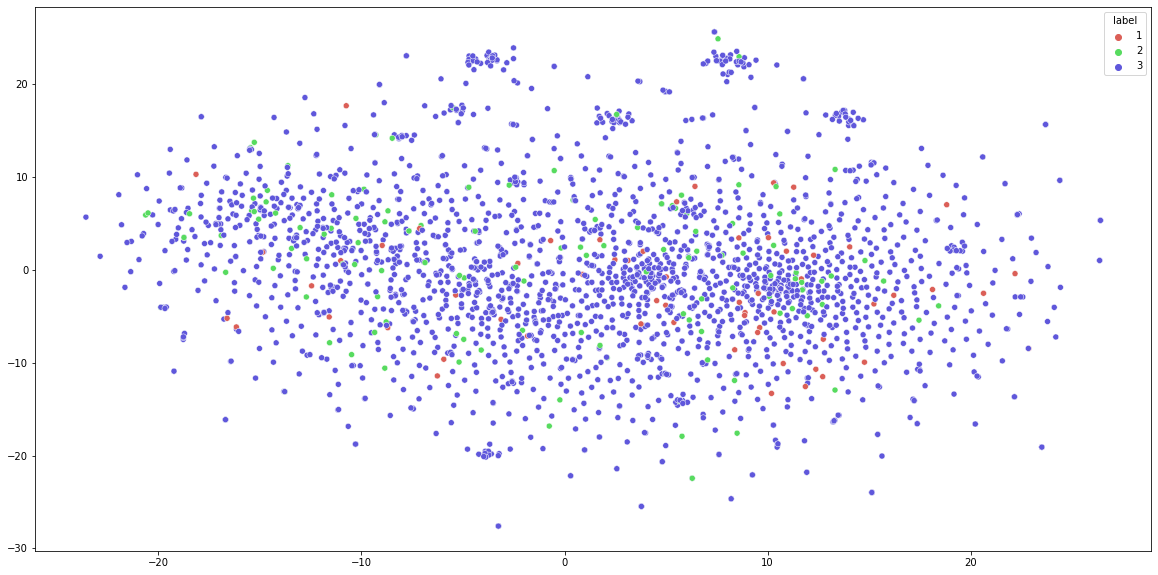

In [ ]:
#tsne_res = tsne.fit_transform(X_oversampled)
Y_oversampled = pd.DataFrame(Y_oversampled)
plt.figure(figsize=(20,10))
#sns.scatterplot(x = tsne_res_after[:,0], y = tsne_res_after[:,1], hue = Y_oversampled.label, palette = sns.hls_palette(3), legend = 'full');
sns.scatterplot(x = tsne_res_before[:,0], y = tsne_res_before[:,1], hue = tweet_data.label, palette = sns.hls_palette(3), legend = 'full');


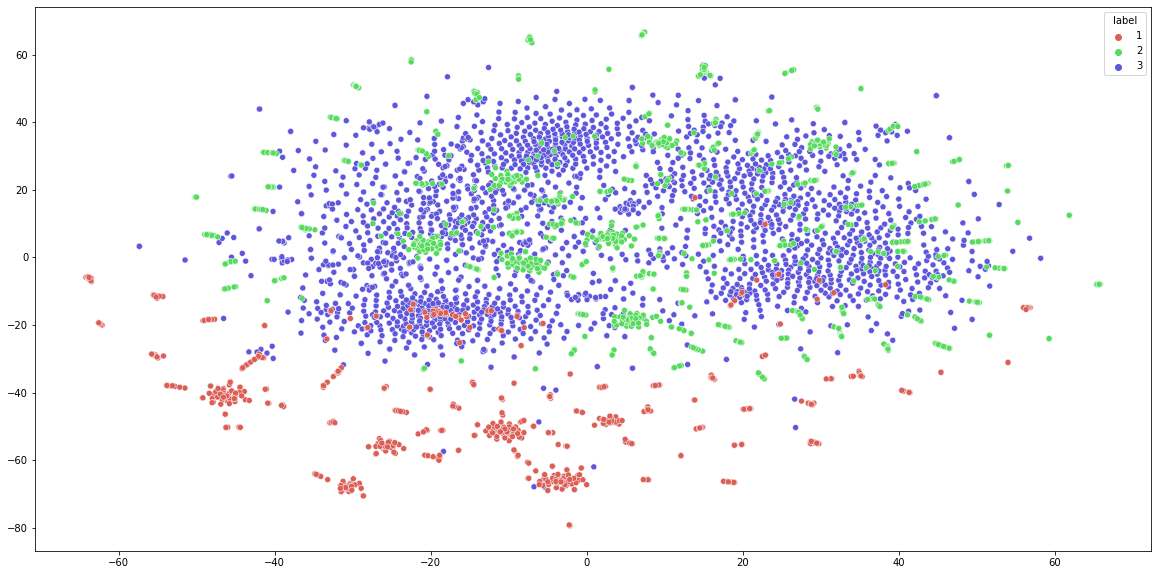

In [ ]:
plt.figure(figsize=(20,10))
sns.scatterplot(x = tsne_res_after[:,0], y = tsne_res_after[:,1], hue = Y_oversampled.label, palette = sns.hls_palette(3), legend = 'full');

In [ ]:
lstm_model = baseline_model()
final_model = KerasClassifier(build_fn = lstm_model, epochs=150, batch_size=10, verbose=0)
# evaluate using 10-fold cross validation
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=10)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead.
  


In [74]:
Y_oversampled_dataframe = pd.DataFrame(Y_oversampled)
Y_oversampled_numpy = Y_oversampled.to_numpy()
Y_oversampled_numpy

#You can use sklearn.preprocessing.LabelBinarizer:

#Example:
label_binarizer = sklearn.preprocessing.LabelBinarizer()

label_binarizer.fit(range(max(Y_oversampled_numpy)+1))
b = label_binarizer.transform(Y_oversampled_numpy)
print(format(b))

[[0 0 0 1]
 [0 0 0 1]
 [0 0 0 1]
 ...
 [0 0 1 0]
 [0 0 1 0]
 [0 0 1 0]]


In [49]:
#sns.countplot(Y_oversampled_dataframe)
#Y_oversampled_dataframe.label.value_counts()
Y_oversampled_dataframe[0]

KeyError: ignored

In [50]:
X_oversampled = X_oversampled.reshape(4263,34,200)
X_oversampled.shape

(4263, 34, 200)

In [ ]:
results = cross_val_score(final_model, X_oversampled, Y_oversampled, cv=kfold)
print(results.mean())

INFO:tensorflow:Assets written to: ram://ee06fed3-96f8-4a5f-9626-cf7fc28231b9/assets


INFO:tensorflow:Assets written to: ram://ee06fed3-96f8-4a5f-9626-cf7fc28231b9/assets


INFO:tensorflow:Assets written to: ram://69e00c12-28f5-478d-b930-aa6b0ad946b4/assets


INFO:tensorflow:Assets written to: ram://69e00c12-28f5-478d-b930-aa6b0ad946b4/assets


INFO:tensorflow:Assets written to: ram://2f6b7a74-b1e9-4ec1-9680-0009ea4c3886/assets


INFO:tensorflow:Assets written to: ram://2f6b7a74-b1e9-4ec1-9680-0009ea4c3886/assets


INFO:tensorflow:Assets written to: ram://a18ac491-4110-4758-bc6a-135bd5544dde/assets


INFO:tensorflow:Assets written to: ram://a18ac491-4110-4758-bc6a-135bd5544dde/assets


INFO:tensorflow:Assets written to: ram://8282f4eb-c93f-4043-8f98-9787cfe7e07e/assets


INFO:tensorflow:Assets written to: ram://8282f4eb-c93f-4043-8f98-9787cfe7e07e/assets


INFO:tensorflow:Assets written to: ram://b9cc8ce0-3b7c-4cc3-b1ea-81cb42f5d4c0/assets


INFO:tensorflow:Assets written to: ram://b9cc8ce0-3b7c-4cc3-b1ea-81cb42f5d4c0/assets


INFO:tensorflow:Assets written to: ram://a870ba34-0f0b-44a0-a745-a2f6b9826cab/assets


INFO:tensorflow:Assets written to: ram://a870ba34-0f0b-44a0-a745-a2f6b9826cab/assets


INFO:tensorflow:Assets written to: ram://48949e5a-8125-45b7-80bc-853869b29232/assets


INFO:tensorflow:Assets written to: ram://48949e5a-8125-45b7-80bc-853869b29232/assets


INFO:tensorflow:Assets written to: ram://e3fa5f57-d011-416d-b8a0-a17ed8d2f756/assets


INFO:tensorflow:Assets written to: ram://e3fa5f57-d011-416d-b8a0-a17ed8d2f756/assets


INFO:tensorflow:Assets written to: ram://5f0f0eba-0a7e-4788-a132-b208170410c7/assets


INFO:tensorflow:Assets written to: ram://5f0f0eba-0a7e-4788-a132-b208170410c7/assets


nan


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
10 fits failed out of a total of 10.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/keras/wrappers/scikit_learn.py", line 232, in fit
    return super(KerasClassifier, self).fit(x, y, **kwargs)
  File "/usr/local/lib/python3.7/dist-packages/keras/wrappers/scikit_learn.py", line 153, in fit
    **self.filter_sk_params(self.build_fn.__call__))
  File "/us

In [ ]:
def tweet_sentiment(input_shape):
  X_indices = Input(input_shape)
  X = LSTM(256, return_sequences=True)(embeddings)
  X = Dropout(0.6)(X)
  X = LSTM(128, return_sequences=True)(X)
  X = Dropout(0.6)(X)
  X = LSTM(128)(X)
  X = Dense(1, activation='tanh')(X)
  model = Model(inputs=X_indices, outputs=X)
  return model

In [ ]:

model.fit(X_train_indices, Y_train, batch_size=64, epochs=15)

In [ ]:
 scores = cross_val_score(model, X, y, cv=5)